# E-learning scenario: offering courses on programming
### In this scenario, we're working for an e-learning company that offers programming courses and they want to promote existing products by investing in advertising. 

### Goal ###
To find out the two best markets to advertise the product in.


Putting into practice statistical concepts regarding summarising distributions using the mean, median and mode. Measuring the variability of a distribution using the range, the mean absolute deviation, the variance and the standard deviation. Furthermore, using z-scores in order to locate any value in a distribution. 

### The data###

I'll be using existing survey data conducted by FreeCodeCamp, a free e-learning platform offering courses on web development. 

Dataset can be downloaded here: https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



### Exploratory steps

In [3]:
survey.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
survey.head(11)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,24.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0


## Sample Representativity

From the survey results, I would like to know:
 - where our respondees are located
 - locations with the greatest number of respondees
 - how much money they are willing to spend on learning
 
Firstly, I need to understand if the data is representative for our population of interest.

### Generating a frequency distribution

The JobRoleInterest column contains the respondees' interested job roles. I'll create a frequency table.

In [5]:
freq_role = survey['JobRoleInterest'].value_counts(normalize = True) * 100
freq_role = freq_role[:20]

In [6]:
print(freq_role)

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

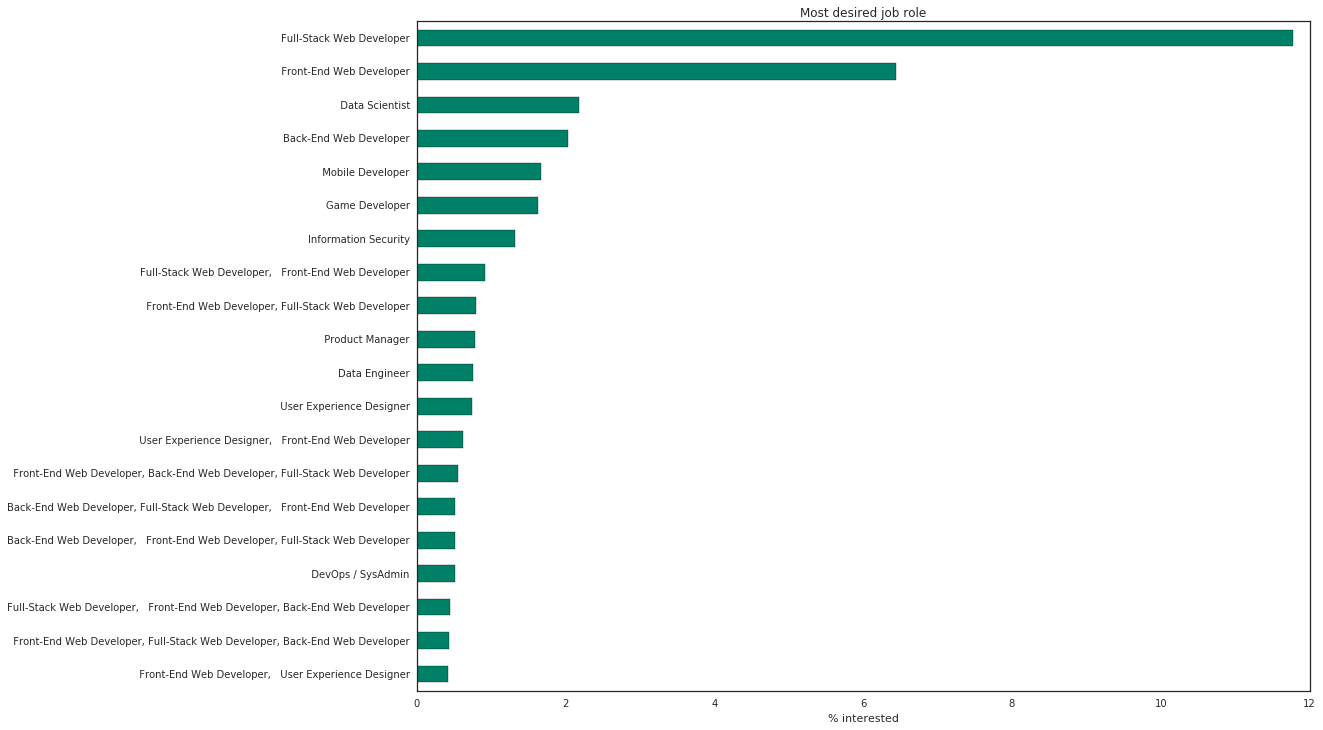

In [7]:
plt.figure(figsize=(16, 12))
sns.set_style('white')
ax = freq_role.plot(kind = "barh", cmap="summer")
ax.set_title("Most desired job role")
ax.set_xlabel("% interested")
plt.gca().invert_yaxis()
#ax.bar_label(ax.containers[0], label_type='edge') - add in on desktop


plt.show()

To follow this up, i'll split the ones that responded with multiple interests in other to further concentrate the data.

In [8]:
split = survey['JobRoleInterest'].str.split(',')

#above resulted in many NaN values, which I then subsequently drop

split = split.dropna()

#generating a frequency chart for percentages of job roles

#using len() instead of count() as within split, each x is a list 
options = split.apply(lambda x: len(x))
options.value_counts(normalize = True).sort_index() * 100


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Plotting amount of respondees that are interested in web or mobile development:

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


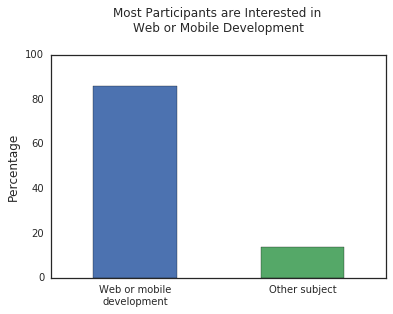

In [9]:
#necessary to remove nulls otherwise it will be plotted as an option
survey_no_nulls = survey['JobRoleInterest'].dropna()

web_or_mobile = survey_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
sns.set_style('white')
freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

### Observations
- most people are interested in development-type jobs, particularly web development
- noticeable amount responded with multiple job role interests
- only 31.65% are interested in one subject
- 86% are interested in web or mobile development

## Determining best countries to advertise in

CountryLive column provides information on the respondees' current location. There is another column, CountryCitizen, which we could use to discover the respondees' country of origin but finding out where they currently live is sufficent for this analysis. 

I'll be looking to identify the amount of potential customers for each country. Firstly, I'll drop all rows where the respondees' did not answer what role they're interested in.

In [10]:
print(survey['JobRoleInterest'].isnull().sum())

responded = survey[survey['JobRoleInterest'].notnull()].copy()

print(responded['JobRoleInterest'].isnull().sum())

11183
0


In [11]:
#generating absolute frequency
proportions = responded['CountryLive'].value_counts()


#relative frequency
percentages = responded['CountryLive'].value_counts(normalize = True) * 100

#combining dataset
pd.DataFrame(data = {'Absolute frequency': proportions, 
                     'Percentage': percentages}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


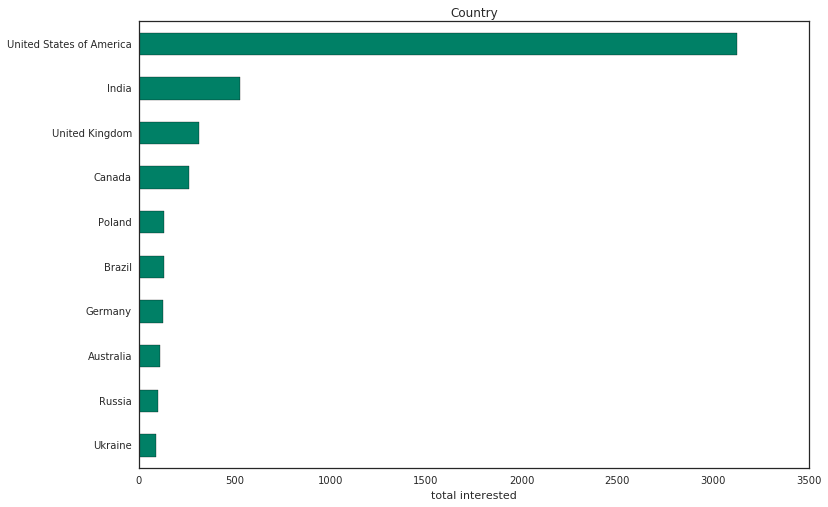

In [12]:
plt.figure(figsize=(12, 8))
sns.set_style('white')
ax = proportions[:10].plot(kind = "barh", cmap="summer")
ax.set_title("Country")
ax.set_xlabel("total interested")
plt.gca().invert_yaxis()
             
plt.show()

### Observations
- the number one best market is clearly the United States of America
- India is also a good candidate, however being a lower GDP country each respondee may have potentially less money to spend
- UK and Canada also ranked highly and so may good candidates

The above only shows where each participant is located and does not tell us how much they're willing to spend (if anything) to learn web/mobile development.

## Willingness to spend

Now I need to determine how much money the respondents are willing to spend. I'll use the `MoneyForLearning column`, which describes how much each respondent spent so far on programming up to completing the survey. 

Since the company operates a subscription-based model, I will focus on how much was spent per month.

To narrow down the search, i'll also filter the data to only the top 4 countries due to the amount of interested respondents. Furthermore, English is the official language for all of the countries and so we do not need to consider the difficulties of implementing multi-language support.

In [13]:
#to avoid division by 0, replace 0 with 1
responded['MonthsProgramming'].replace(0,1, inplace = True)

#calculating spend per month, total money / months
responded['money_per_month'] = responded['MoneyForLearning'] / responded['MonthsProgramming']

#confirmatory step to check for null values which might impact the analysis
responded['money_per_month'].isnull().sum()

675

In [14]:
#dropping null values
responded_good = responded[responded['money_per_month'].notnull()].copy()

#doing the same for the other column of interest, CountryLive
responded_good = responded_good[responded_good['CountryLive'].notnull()].copy()

In [15]:
#filtering for countries of interest
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
responded_good = responded_good[responded_good['CountryLive'].isin(countries)]

#Grouping the data by country to determine average monthly spend by interested countries
responded_good.groupby(['CountryLive']).mean()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
CountryLive,,,,,,,,,,,,,,,,,,,,,
Canada,26.924686,0.037657,0.625000,0.222222,0.555556,1.888889,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,113.510961
India,21.458515,0.015184,0.166667,0.166667,0.833333,1.333333,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,135.100982
United Kingdom,28.620939,0.025090,0.714286,0.571429,0.857143,1.833333,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,45.534443
United States of America,29.382282,0.081877,0.529661,0.341772,0.772152,1.918367,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,227.997996


### Observations
- the highest average spend is within the USA, followed by India, Canada and the UK
- the mean spend for the UK seems relatively low and India relatively high, given that the figure is by $ and not local currency, it seems unusual

Some possible explanations: lack of representative data for UK and India, or outliers impacting data. 

## Dealing with the outliers

In order to deal with outliers, I first require a way of visualising the data in a way that will allow me to detect them. My approach will be to create box plots for each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



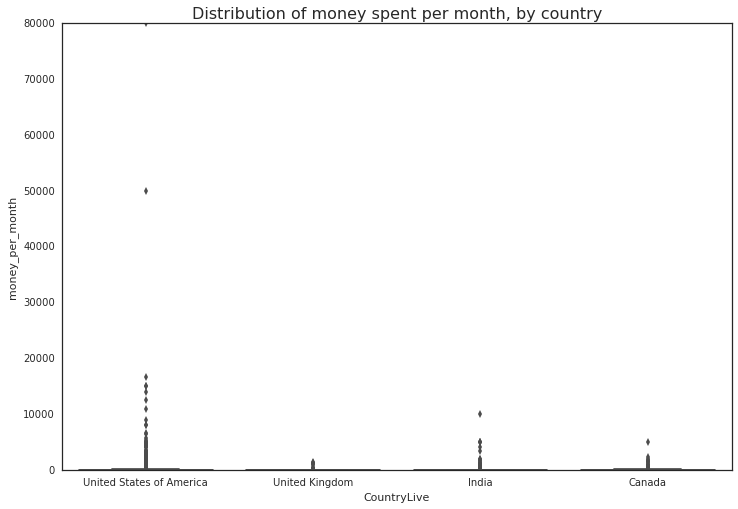

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'CountryLive', y='money_per_month', data = responded_good)
plt.title('Distribution of money spent per month, by country', size=16)
plt.show()

### Observations
- for the US, there are extreme outliers that could easily  be removed
- not immediately obvious for the other countries if the data is impacted by outliers

In [17]:
#removing outliers
responded_good = responded_good[responded_good['money_per_month'] < 20000]

In [18]:
#due to the significant amount of outliers within the Indian respondents, i'll isolate their responses

india_outliers = responded_good[(responded_good['CountryLive'] == 'India') &  (responded_good['money_per_month'] >= 2500)]

#filtering to a select few  columns that might relate to income and spending
india_outliers[['EmploymentStatus','money_per_month', 'MonthsProgramming', 'Income', 'HoursLearning', 'AttendedBootcamp']]

,EmploymentStatus,money_per_month,MonthsProgramming,Income,HoursLearning,AttendedBootcamp
1728,A stay-at-home parent or homemaker,5000.000000,4.0,NaN,30.0,0.0
1755,Not working and not looking for work,3333.333333,15.0,NaN,10.0,0.0
7989,Employed for wages,5000.000000,1.0,300000.0,20.0,0.0
8126,Not working but looking for work,5000.000000,1.0,NaN,80.0,0.0
13398,Unable to work,10000.000000,2.0,NaN,30.0,0.0
15587,Employed for wages,4166.666667,24.0,60000.0,36.0,0.0


### Observations
- none of the respondents attended a bootcamp, which usually charge a high amount and so could account for a high spend
- only 2 of the respondents are working, though we know little of their overall financial situation to say that those unemployed are not being supported financially

These outliers can therefore be excluded as the money per month ($) seems excessive, given that these figures are per month and most have several months of programming.

In [19]:
#removing outliers
responded_good = responded_good.drop(india_outliers.index)

In [20]:
#examining US outliers
us_outliers = responded_good[(responded_good['CountryLive'] == 'United States of America') & 
                             (responded_good['money_per_month'] >= 6000)]

#filtering to a select few  columns that might relate to income and spending
us_outliers[['EmploymentStatus','money_per_month', 'MonthsProgramming', 'Income', 'HoursLearning', 'AttendedBootcamp']]

,EmploymentStatus,money_per_month,MonthsProgramming,Income,HoursLearning,AttendedBootcamp
718,Employed for wages,8000.000000,1.0,44500.0,35.0,1.0
1222,Not working and not looking for work,6500.000000,2.0,NaN,50.0,1.0
3184,Employed for wages,9000.000000,1.0,40000.0,10.0,1.0
3930,Not working and not looking for work,10833.333333,6.0,NaN,50.0,0.0
6805,Not working but looking for work,15000.000000,1.0,NaN,45.0,1.0
7198,Employed for wages,14000.000000,5.0,NaN,4.0,0.0
7505,Not working but looking for work,6666.666667,3.0,NaN,40.0,1.0
9778,Employed for wages,8000.000000,1.0,20000.0,40.0,1.0
16650,Not working but looking for work,16666.666667,12.0,NaN,40.0,0.0
16997,Employed for wages,12500.000000,1.0,40000.0,12.0,0.0


### Observations
- 6 of the respondents attended a bootcamp, which could account for a high monthly spend
- one spent 15000 a month, and did attend a bootcamp - however, this is not an accurate reflection of monthly spend because they have only been programming for 1 month; in the long run, their monthly spend would be spread out as they are unlikely to spend any further money on learning
- for the other respondents, nothing justifies the extreme spend and so will be excluded

In [21]:
#isolating those that did not attend bootcamp
us_outliers_drop = responded_good[(responded_good['CountryLive'] == 'United States of America') & 
                             (responded_good['money_per_month'] >= 6000) &
                            (responded_good['AttendedBootcamp'] == 0)]

responded_good = responded_good.drop(us_outliers_drop.index)

#isolating those that spent less than 3 months learning
us_outliers_high = responded_good[(responded_good['CountryLive'] == 'United States of America') & 
                             (responded_good['money_per_month'] >= 6000) &
                                 (responded_good['MonthsProgramming'] <= 3)]


responded_good = responded_good.drop(us_outliers_high.index)

In [22]:
responded_good.groupby(['CountryLive']).mean()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
CountryLive,,,,,,,,,,,,,,,,,,,,,
Canada,26.924686,0.037657,0.625000,0.222222,0.555556,1.888889,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,113.510961
India,21.433628,0.015385,0.166667,0.166667,0.833333,1.333333,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,65.758763
United Kingdom,28.620939,0.025090,0.714286,0.571429,0.857143,1.833333,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,45.534443
United States of America,29.359072,0.079835,0.537118,0.334783,0.773913,1.919776,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,142.654608


In [23]:
can_outliers = responded_good[(responded_good['CountryLive'] == 'Canada') & 
                             (responded_good['money_per_month'] >= 4000)]

#filtering to a select few  columns that might relate to income and spending
can_outliers[['EmploymentStatus','money_per_month', 'MonthsProgramming', 'Income', 'HoursLearning', 'AttendedBootcamp']]

,EmploymentStatus,money_per_month,MonthsProgramming,Income,HoursLearning,AttendedBootcamp
13659,Employed for wages,5000.0,2.0,140000.0,10.0,1.0


### Observations
- like the US outliers, this one individual has a high monthly spend, most likely owing to attending a bootcamp
- their months programming is only 2 months; it's reasonable to exclude based on the same principles as the US outliers; the monthly spend is not an accurate reflection due to the limited time programming vs initial cost of a bootcamp

In [24]:
can_outliers_drop = responded_good[(responded_good['CountryLive'] == 'Canada') & 
                             (responded_good['money_per_month'] >= 4000)]

responded_good = responded_good.drop(can_outliers_drop.index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



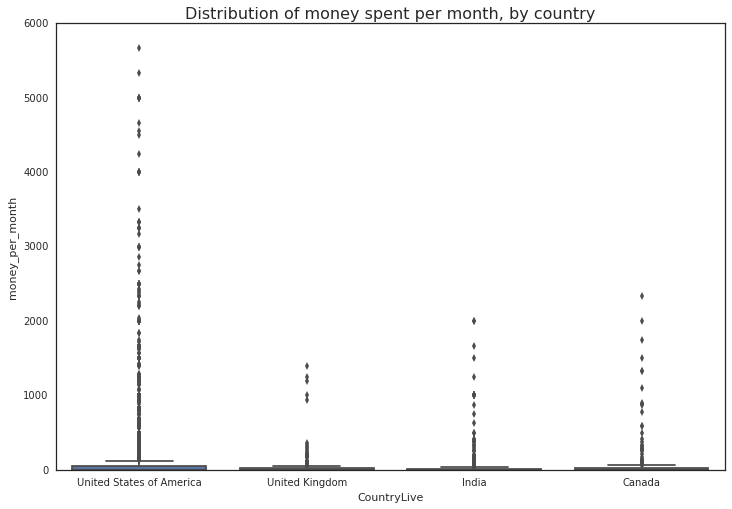

In [25]:
#rerun the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'CountryLive', y='money_per_month', data = responded_good)
plt.title('Distribution of money spent per month, by country', size=16)
plt.show()

In [26]:
responded_good.groupby(['CountryLive']).mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

## Choosing the best two markets to advertise in

When making my decision I need to take into account the monthly spend but also the number of respondents within the top 4 countries. 

An obvious first choice would be to advertise in the US because of the high monthly spend

In [27]:
amount = responded_good['CountryLive'].value_counts()

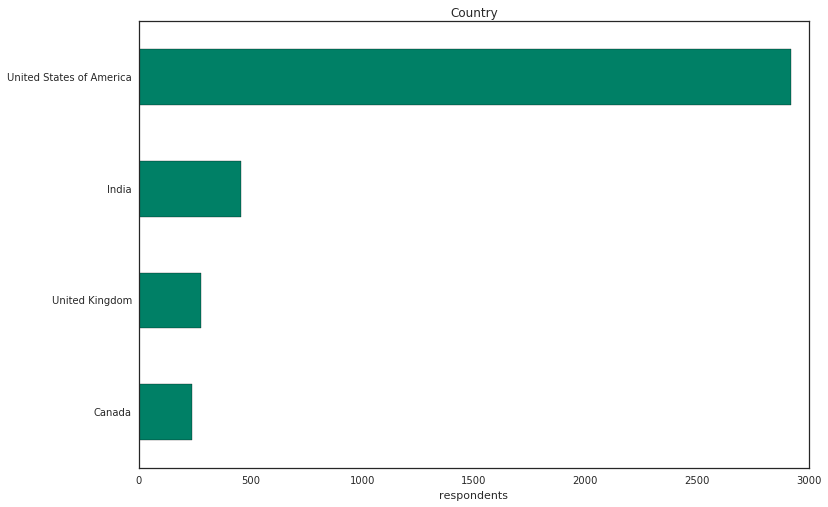

In [28]:
#determining amount of respondents
plt.figure(figsize=(12, 8))
sns.set_style('white')
ax = amount.plot(kind = "barh", cmap="summer")
ax.set_title("Country")
ax.set_xlabel("respondents")
plt.gca().invert_yaxis()
             
plt.show()

### Observations
- US has the highest monthly spend and respondents, and so would be the top pick 
- Canada has a higher monthly spend than India, however has fewer respondents and potentially a smaller customer base
- United Kingdom has the lowest monthly spend and a similar number of respondents as Canada
- India has an acceptable monthly spend (our target is $59 per month) and the second largest amount of respondents

Another thing to consider would be language support - though one of the official languages of India is English, if we were to advertise and operate in India it would be wise to take into consideration the most common language of our respondents.

In [31]:
india_lang = responded_good[(responded_good['CountryLive'] == 'India')]

lang = india_lang['LanguageAtHome'].value_counts(normalize = True) * 100

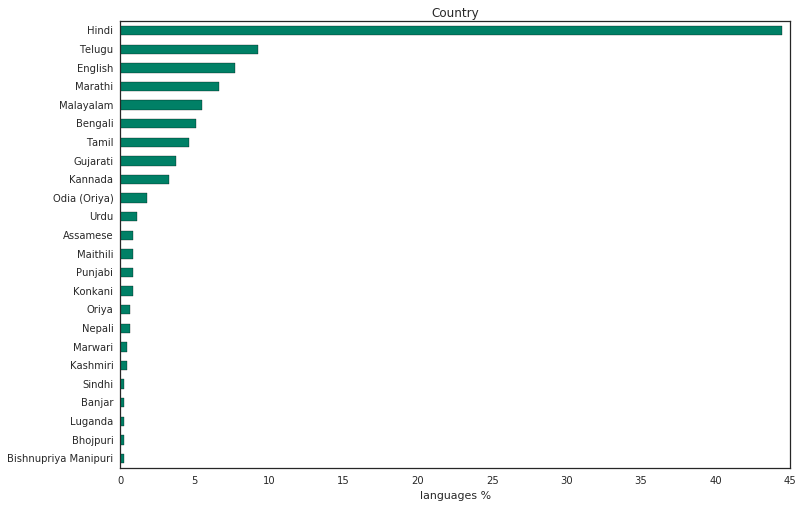

In [33]:
plt.figure(figsize=(12, 8))
sns.set_style('white')
ax = lang.plot(kind = "barh", cmap="summer")
ax.set_title("Country")
ax.set_xlabel("languages %")
plt.gca().invert_yaxis()
             
plt.show()

### Conclusion

Advertising in the US would be the first, obvious choice. Advertising in India would also be viable. However, there are other factors to consider. nearly 45% of respondents speak Hindi as their first language at home and only 7.7% speak English. 

Though that doesn't necessarily reflect how well English would be understood by our respondents (Those that speak Hindi at home may also understand and speak English fluently), if we were to be successful it may be better to invest in multi-language support.

Alternatively, if this wouldn't be feasible due to budget constraints or resourcing issues, then advertising solely within the US is also another option.